In [1]:
import random 
import pandas as pd
import numpy as np
import csv
from pandasql import sqldf
import statistics as stat
from statistics import mean
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import chi2

In [2]:
# Import ACB.csv for a year's worth of daily price data for ACB (ACBchat) stock 
file1 = 'Buxton_Challenge_Data.csv'
buxtonFile = pd.read_csv(file1, sep = ',')

# Grab ACB Close column in a DataFrame
dfBuxtonData = sqldf('''SELECT * FROM buxtonFile;''')
dfBuxtonData.head(20)

,SID,OPEN_YEAR,DENSITY_CLASS,REGION,STATE,SQFT,SALES_2016,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
0,21266491,NaN,2,SA,WV,44312.0,NaN,12577,42856,4562,...,95.04,94.38,91.29,93.65,93.28,89.92,3262854.94,723.47,2629199.03,510.38
1,21266492,NaN,2,SA,WV,47425.0,NaN,22113,42658,7638,...,88.49,81.97,87.78,86.80,79.71,85.79,3745254.61,704.30,4714278.64,501.17
2,21266493,NaN,2,SA,WV,17710.0,NaN,10016,37535,3214,...,96.14,93.11,94.20,94.70,92.13,92.71,2767007.12,723.39,2259801.14,460.22
3,21266494,NaN,2,MA,PA,59989.0,NaN,22118,51705,7953,...,92.95,89.92,93.15,89.33,87.28,91.56,4615043.23,728.06,4933560.86,552.78
4,21266495,NaN,3,SA,WV,60720.0,NaN,32392,60289,10830,...,93.99,95.66,96.62,91.94,94.36,95.57,5234084.09,643.69,5956571.33,460.80
5,21266496,1983.0,2,MA,PA,52861.0,6585542.0,22452,62057,7866,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.66,800.61,2599706.69,503.14
6,21266497,1984.0,2,SA,MD,50399.0,7580096.0,23272,51235,7276,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.57,812.68,5430226.19,537.17
7,21266498,1985.0,2,SA,WV,45520.0,7538990.0,16522,39299,5693,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.34,682.62,3323540.34,450.89
8,21266499,1986.0,2,ENC,OH,53872.0,6917103.0,8465,57556,3237,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.55,713.33,4296301.15,493.88
9,21266500,1987.0,3,MA,PA,62109.0,8395815.0,25324,139069,8964,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.17,700.44,5641977.41,480.37


C:\Users\mckee\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\mckee\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


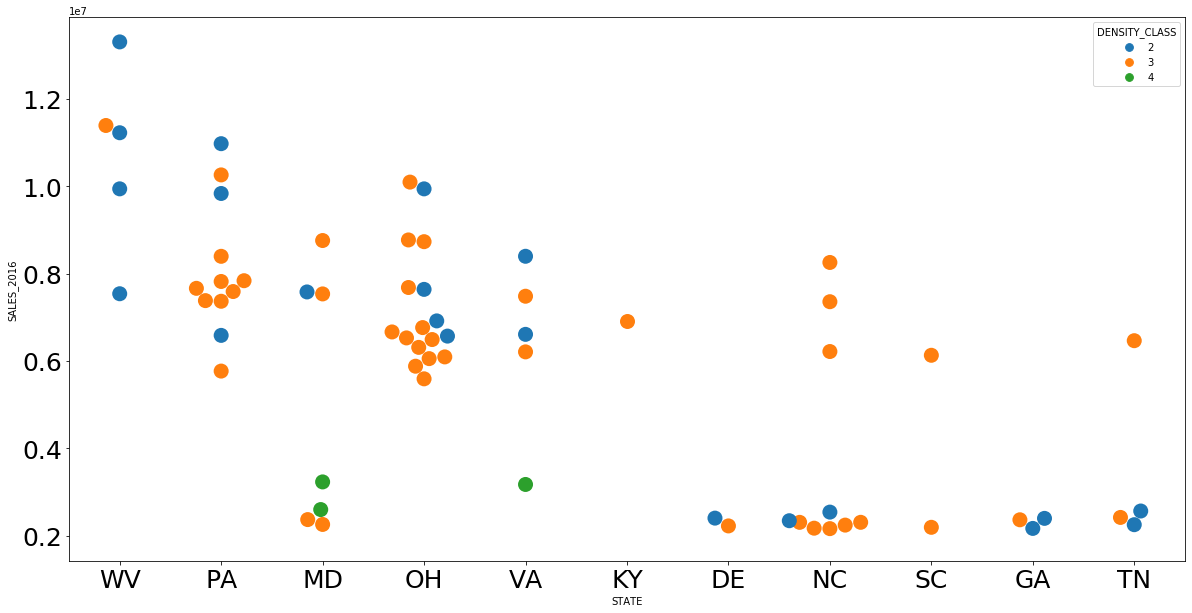

In [3]:
# Displays results based on outcome subtype and adoption results
buxtonResults = dfBuxtonData.groupby(['DENSITY_CLASS']).head(100)
plt.figure(figsize=(20,10))
g = sns.swarmplot(x='STATE', y='SALES_2016', hue='DENSITY_CLASS', 
                  data=buxtonResults, size=15)
g.tick_params(labelsize=25)

In [ ]:
# Scatter plot of sales vs square footage
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['SQFT'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS SQFT',fontsize=20)
plt.xlabel('SQFT',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs state
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['STATE'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS STATE',fontsize=20)
plt.xlabel('STATE',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XAGE_SENIOR65P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_SENIOR65P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS XAGE_SENIOR65P_16TO',fontsize=20)
plt.xlabel('XAGE_SENIOR65P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHHINC_50_74K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_50_74K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS XHHINC_50_74K_16TO',fontsize=20)
plt.xlabel('XHHINC_50_74K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHHINC_L25K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_L25K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS XHHINC_L25K_16TO',fontsize=20)
plt.xlabel('XHHINC_L25K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHU_OWNOCC_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHU_OWNOCC_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS XHU_OWNOCC_16TO',fontsize=20)
plt.xlabel('XHU_OWNOCC_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs MIN_DIST_SCHOL
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['MIN_DIST_SCHOL'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS MIN_DIST_SCHOL',fontsize=20)
plt.xlabel('MIN_DIST_SCHOL',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XAGE_ADULT18P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_ADULT18P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS XAGE_ADULT18P_16TO',fontsize=20)
plt.xlabel('XAGE_ADULT18P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XAGE_BABYBOOM5069_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_BABYBOOM5069_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS XAGE_BABYBOOM5069_16TO',fontsize=20)
plt.xlabel('XAGE_BABYBOOM5069_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XAGE_DRINKADULT21P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_DRINKADULT21P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS XAGE_DRINKADULT21P_16TO',fontsize=20)
plt.xlabel('XAGE_DRINKADULT21P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XAGE_ELDERLY7085P_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XAGE_ELDERLY7085P_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS XAGE_ELDERLY7085P_16TO',fontsize=20)
plt.xlabel('XAGE_ELDERLY7085P_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHHINC_50_74K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_50_74K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS XHHINC_50_74K_16TO',fontsize=20)
plt.xlabel('XHHINC_50_74K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHHINC_L25K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHHINC_L25K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS XHHINC_L25K_16TO',fontsize=20)
plt.xlabel('XHHINC_L25K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHU_OWNOCC_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHU_OWNOCC_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS XHU_OWNOCC_16TO',fontsize=20)
plt.xlabel('XHU_OWNOCC_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHU_VAC_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHU_VAC_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS XHU_VAC_16TO',fontsize=20)
plt.xlabel('XHU_VAC_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHVAL_50_99K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHVAL_50_99K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS XHVAL_50_99K_16TO',fontsize=20)
plt.xlabel('XHVAL_50_99K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHVAL_100_249K_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHVAL_100_249K_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS XHVAL_100_249K_1RO',fontsize=20)
plt.xlabel('XHVAL_100_249K_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XHVAL_L49K_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XHVAL_L49K_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS XHVAL_L49K_16TO',fontsize=20)
plt.xlabel('XHVAL_L49K_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XLABOR_EMP_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XLABOR_EMP_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS XLABOR_EMP_1RO',fontsize=20)
plt.xlabel('XLABOR_EMP_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XLABOR_SRV_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XLABOR_SRV_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS XLABOR_SRV_16TO',fontsize=20)
plt.xlabel('XLABOR_SRV_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XRACE_WHTHH_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XRACE_WHTHH_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS XRACE_WHTHH_16TO',fontsize=20)
plt.xlabel('XRACE_WHTHH_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs XRACE_WHTPOP_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['XRACE_WHTPOP_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS XRACE_WHTPOP_16TO',fontsize=20)
plt.xlabel('XRACE_WHTPOP_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CUSTOMER_VALUE_QUAL
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CUSTOMER_VALUE_QUAL'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS CUSTOMER_VALUE_QUAL',fontsize=20)
plt.xlabel('CUSTOMER_VALUE_QUAL',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_300K_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_300K_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS CNT_MALLS_300K_0_5RO',fontsize=20)
plt.xlabel('CNT_MALLS_300K_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_COMP_A_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_A_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS CMDSC_COMP_A_1RO',fontsize=20)
plt.xlabel('CMDSC_COMP_A_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AXFOOT_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AXFOOT_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS AXFOOT_0_5RO',fontsize=20)
plt.xlabel('AXFOOT_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs LOR_AVG_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['LOR_AVG_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS LOR_AVG_16TO',fontsize=20)
plt.xlabel('LOR_AVG_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Stop here

In [ ]:
# Scatter plot of sales vs density class
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['DENSITY_CLASS'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS DENSITY CLASS',fontsize=20)
plt.xlabel('DENSITY CLASS',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AMENBOYS_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AMENBOYS_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS AMENBOYS_0_5RO',fontsize=20)
plt.xlabel('AMENBOYS_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AMENBOYS_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AMENBOYS_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS AMENBOYS_1RO',fontsize=20)
plt.xlabel('AMENBOYS_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AMENBOYS_8TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AMENBOYS_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS AMENBOYS_8TO',fontsize=20)
plt.xlabel('AMENBOYS_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AMENBOYS_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AMENBOYS_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS AMENBOYS_16TO',fontsize=20)
plt.xlabel('AMENBOYS_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AWMNSGRLS_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AWMNSGRLS_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS AWMNSGRLS_0_5RO',fontsize=20)
plt.xlabel('AWMNSGRLS_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AWMNSGRLS_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AWMNSGRLS_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS AWMNSGRLS_1RO',fontsize=20)
plt.xlabel('AWMNSGRLS_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AWMNSGRLS_8TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AWMNSGRLS_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS AWMNSGRLS_8TO',fontsize=20)
plt.xlabel('AWMNSGRLS_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AWMNSGRLS_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AWMNSGRLS_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS AWMNSGRLS_16TO',fontsize=20)
plt.xlabel('AWMNSGRLS_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AXFOOT_0_5RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AXFOOT_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS AXFOOT_0_5RO',fontsize=20)
plt.xlabel('AXFOOT_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AXFOOT_1RO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AXFOOT_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS AXFOOT_1RO',fontsize=20)
plt.xlabel('AXFOOT_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AXFOOT_8TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AXFOOT_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS AXFOOT_8TO',fontsize=20)
plt.xlabel('AXFOOT_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs AXFOOT_16TO
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['AXFOOT_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS AXFOOT_16TO',fontsize=20)
plt.xlabel('AXFOOT_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_COMP_A_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - Competitor A
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_A_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS cCOMPETITOR A 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_COMP_A_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_COMP_B_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - Competitor B
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_B_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS COMPETITOR B 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_COMP_B_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_COMP_C_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - Competitor C
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_C_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS COMPETITOR C 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_COMP_C_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_COMP_D_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - Competitor D
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_D_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS COMPETITOR D 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_COMP_D_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_COMP_E_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - Competitor E
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_COMP_E_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS COMPETITOR E 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_COMP_E_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_GROCERY_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - All Grocery Stores (e.g. Kroger, Albertson's)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_GROCERY_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS GROCERY STORE 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_GROCERY_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CMDSC_PCBB_1RO
# Distance Score (Closer Proximity and Greater Count = Higher Value) - All Big-Box Retailers (e.g. Best Buy, Academy Sports)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CMDSC_PCBB_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS BIG BOX RETAILER 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CMDSC_PCBB_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_A_0_5RO
# Count  - Competitor A
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_A_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR A 5 RADIUS MILES AWAY',fontsize=20)
plt.xlabel('CM_COMP_A_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_A_1RO
# Count  - Competitor A
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_A_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR A 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CM_COMP_A_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_A_8TO
# Count  - Competitor A
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_A_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR A 8 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_A_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_A_16TO
# Count  - Competitor A
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_A_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR A 16 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_A_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_B_0_5RO
# Count  - Competitor B
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_B_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR B 5 RADIUS MILES AWAY',fontsize=20)
plt.xlabel('CM_COMP_B_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_B_1RO
# Count  - Competitor B
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_B_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR B 1 RADIUS MILE AWAY',fontsize=20)
plt.xlabel('CM_COMP_B_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_B_8TO
# Count  - Competitor B
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_B_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR B AN 8 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_B_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_B_16TO
# Count  - Competitor B
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_B_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR B A 16 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_B_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_C_0_5RO
# Count  - Competitor C
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_C_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR C WITHIN A 5 MILE RADIUS',fontsize=20)
plt.xlabel('CM_COMP_C_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_C_1RO
# Count  - Competitor C
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_C_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR C WITHIN A 1 MILE RADIUS',fontsize=20)
plt.xlabel('CM_COMP_C_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_C_8TO
# Count  - Competitor C
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_C_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR C AN 8 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_C_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_C_16TO
# /Count  - Competitor C
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_C_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR C A 16 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_C_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_D_0_5RO
# Count  - Competitor D
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_D_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR D WITHIN A 5 MILE RADIUS',fontsize=20)
plt.xlabel('CM_COMP_D_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_D_1RO
# Count  - Competitor D
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_D_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR D WITHIN A 1 MILE RADIUS',fontsize=20)
plt.xlabel('CM_COMP_D_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_D_8TO
# Count  - Competitor D
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_D_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR D AN 8 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_D_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_D_16TO
# Count  - Competitor D
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_D_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR D A 16 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_D_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_E_0_5RO
# Count  - Competitor E
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_E_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR E WITHIN A 5 MILE RADIUS',fontsize=20)
plt.xlabel('CM_COMP_E_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_E_1RO
# Count  - Competitor E
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_E_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR E WITHIN A 1 MILE RADIUS',fontsize=20)
plt.xlabel('CM_COMP_E_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_E_8TO
# Count  - Competitor E
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_E_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR E AN 8 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_E_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_COMP_E_16TO
# Count  - Competitor E
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_COMP_E_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS COUNT OF COMPETITOR E A 16 MINUTE DRIVE AWAY',fontsize=20)
plt.xlabel('CM_COMP_E_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_GROCERY_0_5RO
# Count  - All Grocery (e.g. Kroger, Albertson's)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_GROCERY_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS COUNT OF GROCERY STORES WITHIN 5 RADIUS MILES',fontsize=20)
plt.xlabel('CM_GROCERY_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_GROCERY_1RO
# Count  - All Grocery (e.g. Kroger, Albertson's)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_GROCERY_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS COUNT OF GROCERY STORES WITHIN 1 RAIDUS MILE',fontsize=20)
plt.xlabel('CM_GROCERY_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_PCBB_0_5RO
# Count  - All Big-Box Retailers (e.g. Best Buy, Academy Sports)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_PCBB_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS COUNT OF BIG BOX REATILERS WITHIN 5 RADIUS MILES',fontsize=20)
plt.xlabel('CM_PCBB_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CM_PCBB_1RO
# Count  - All Big-Box Retailers (e.g. Best Buy, Academy Sports)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CM_PCBB_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS COUNT OF BIG BOX RETAILER WITHIN 1 RADIUS MILE',fontsize=20)
plt.xlabel('CM_PCBB_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_0_5RO
# Count of All Malls or Shopping Centers
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS COUNT OF ALL MALLS WITHIN 5 RADIUS MILES',fontsize=20)
plt.xlabel('CNT_MALLS_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_1RO
# Count of All Malls or Shopping Centers
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS COUNT OF ALL MALLS WITHIN 1 RADIUS MILE',fontsize=20)
plt.xlabel('CNT_MALLS_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_100K_0_5RO
# Count of Malls or Shopping Centers with >100K SQFT of Gross Leasable Area (GLA)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_100K_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS COUNT OF MALLS WITH >100K SQT WITHIN 5 RADIUS MILES',fontsize=20)
plt.xlabel('CNT_MALLS_100K_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_100K_1RO
# Count of Malls or Shopping Centers with >100K SQFT of Gross Leasable Area (GLA)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_100K_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS COUNT OF MALLS WITH >100K SQFT WITHIN 1 RADIUS MILE',fontsize=20)
plt.xlabel('CNT_MALLS_100K_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_300K_0_5RO
# Count of Malls or Shopping Centers with >300K SQFT of Gross Leasable Area (GLA)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_300K_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS COUNT OF MALLS WITH >300K SQFT WITHIN 5 RADIUS MILES',fontsize=20)
plt.xlabel('CNT_MALLS_300K_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CNT_MALLS_300K_1RO
# Count of Malls or Shopping Centers with >300K SQFT of Gross Leasable Area (GLA)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CNT_MALLS_300K_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS COUNT OF MALLS WITH >300K SQFT WITHIN 1 RADIUS MILE',fontsize=20)
plt.xlabel('CNT_MALLS_300K_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs COMMUTE_AVG_1RO
# Commute Time: Average
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['COMMUTE_AVG_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS COMMUTE AVG FOR 1 RADIUS MILE',fontsize=20)
plt.xlabel('COMMUTE_AVG_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs COMMUTE_AVG_8TO
# Commute Time: Average
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['COMMUTE_AVG_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS COMMUTE AVERAGE FOR AN 8 MINUTE DRIVE',fontsize=20)
plt.xlabel('COMMUTE_AVG_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs COMMUTE_AVG_16TO
# Commute Time: Average
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['COMMUTE_AVG_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS COMMUTE AVG FOR A 16 MINUTE DRIVE',fontsize=20)
plt.xlabel('COMMUTE_AVG_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V142_0_5RO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Household textiles
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V142_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS CONSUMER EST OF TOTAL HOUSEHOLD FURNISHING AND TEXTILE EXPENDITURES WITHIN 5 MILE RADIUS',fontsize=20)
plt.xlabel('CX01V142_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V142_1RO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Household textiles
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V142_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS CONSUMER EST OF TOTAL HOUSEHOLD FURNISHING AND TEXTILE EXPENDITURES WITHIN 1 MILE RADIUS',fontsize=20)
plt.xlabel('CX01V142_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V142_8TO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Household textiles
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V142_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS CONSUMER EST OF TOTAL HOUSEHOLD FURNISHING AND TEXTILE EXPENDITURES WITHIN 8 MINUTE DRIVE',fontsize=20)
plt.xlabel('CX01V142_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V142_16TO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Household textiles
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V142_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS CONSUMER EST OF TOTAL HOUSEHOLD FURNISHING AND TEXTILE EXPENDITURES WITHIN 16 MINUTE DRIVE',fontsize=20)
plt.xlabel('CX01V142_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V143_0_5RO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Furniture
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V143_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS CONSUMER EST FOR TOTAL HOUSEHOLD FURNISHINGS AND FURNITURE EXPENDITURES WITHIN A 5 MILE RADIUS',fontsize=20)
plt.xlabel('CX01V143_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V143_1RO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Furniture
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V143_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS CONSUMER EST FOR TOTAL HOUSEHOLD FURNISHINGS AND FURNITURE EXPENDITURES WITHIN A 1 MILE RADIUS',fontsize=20)
plt.xlabel('CX01V143_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V143_8TO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Furniture
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V143_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS CONSUMER EST FOR TOTAL HOUSEHOLD FURNISHINGS AND FURNITURE EXPENDITURES WITHIN A 8 MINUTE DRIVE',fontsize=20)
plt.xlabel('CX01V143_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX01V143_8TO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Housing Household furnishings and equipment Total Furniture
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX01V143_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='purple')
plt.title('SCATTER PLOT SALES VS CONSUMER EST FOR TOTAL HOUSEHOLD FURNISHINGS AND FURNITURE EXPENDITURES WITHIN A 16 MINUTE DRIVE',fontsize=20)
plt.xlabel('CX01V143_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX02V051_0_5RO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Apparel and services Total Children under 2
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX02V051_0_5RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='pink')
plt.title('SCATTER PLOT SALES VS CONSUMER EST TOTAL APPAREL AND CHILD UNDER 2 EXPENDITURES WITHIN 5 RADIUS MILES',fontsize=20)
plt.xlabel('CX02V051_0_5RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX02V051_1RO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Apparel and services Total Children under 2
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX02V051_1RO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='red')
plt.title('SCATTER PLOT SALES VS CONSUMER EST TOTAL APPAREL AND CHILD UNDER 2 EXPENDITURES WITHIN 1 RADIUS MILE',fontsize=20)
plt.xlabel('CX02V051_1RO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX02V051_8TO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Apparel and services Total Children under 2
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX02V051_8TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='orange')
plt.title('SCATTER PLOT SALES VS CONSUMER EST TOTAL APPAREL AND CHILD UNDER 2 EXPENDITURES WITHIN 8 MINUTE DRIVE',fontsize=20)
plt.xlabel('CX02V051_8TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs CX02V051_16TO
# Consumer Expenditure Current Year Estimates A (2015) Total Expenditure Apparel and services Total Children under 2
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['CX02V051_16TO'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='yellow')
plt.title('SCATTER PLOT SALES VS CONSUMER EST TOTAL APPAREL AND CHILD UNDER 2 EXPENDITURES WITHIN 16 MINUTE DRIVE',fontsize=20)
plt.xlabel('CX02V051_16TO',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs DIST_HWY
# Distance to nearest highway (Miles)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['DIST_HWY'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='green')
plt.title('SCATTER PLOT SALES VS DISTANCE TO NEAREST HIGHWAY IN MILES',fontsize=20)
plt.xlabel('DIST_HWY',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs DIST_INTERSTATE
# Distance to nearest interstate highway (Miles)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['DIST_INTERSTATE'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS DISTANCE TO NEAREST INTERSTATE HIGHWAY IN MILES',fontsize=20)
plt.xlabel('DIST_INTERSTATE',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
# Scatter plot of sales vs DIST_INTERSTATE
# Distance to nearest interstate highway (Miles)
plt.figure(figsize=(15,7))
plt.scatter(dfBuxtonData['DIST_INTERSTATE'].iloc[5:],dfBuxtonData['SALES_2016'].iloc[5:],s=100,marker='o',color='blue')
plt.title('SCATTER PLOT SALES VS DISTANCE TO NEAREST INTERSTATE HIGHWAY IN MILES',fontsize=20)
plt.xlabel('DIST_INTERSTATE',fontsize=15)
plt.ylabel('SALES',fontsize=15)
plt.tick_params(labelsize=20)
plt.show()